The following analysis uses a subset of the Framingham Heart Study to draw meanginful statistically based conclusions.

Developed by Ahmed Kayal

#### Package imports

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

<br>

##### File read and overview

In [2]:
framingham_heart_study = pd.read_csv("/Users/ahmed/Desktop/FramHSn500.csv")
framingham_heart_study.shape

(500, 12)

In [3]:
framingham_heart_study.head()

,RANDID,SEX,AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,FRAM_BMI,COFFEE,DIABETES,HEARTDIS,ANYDEATH
0,9651782,2,56,134.0,75.0,217,1,29.585464,2,0,0,0
1,9309361,1,63,110.0,68.0,217,1,21.991694,3,0,0,1
2,8224634,2,54,135.0,85.0,230,0,19.177015,1,0,0,0
3,6215341,1,44,134.0,88.0,240,1,31.623093,6,0,0,1
4,2930353,2,50,156.0,90.0,298,1,24.047991,6,0,0,0


In [4]:
relevant_binary_cols = ['SEX', 'DIABETES', 'HEARTDIS', 'ANYDEATH']
relevant_continuous_cols = ['AGE', 'SYSBP', 'DIABP', 'TOTCHOL', 'FRAM_BMI', 'COFFEE']
framingham_heart_study[relevant_continuous_cols].describe()

,AGE,SYSBP,DIABP,TOTCHOL,FRAM_BMI,COFFEE
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.826000,133.282000,83.363000,233.704000,25.535635,2.854000
std,8.458535,22.470789,12.314911,42.065513,4.084633,1.703669
min,34.000000,83.500000,50.000000,143.000000,15.963078,0.000000
25%,43.000000,118.000000,75.000000,202.750000,22.769689,2.000000
50%,49.000000,130.000000,82.000000,232.500000,24.988736,3.000000
75%,56.000000,145.000000,89.000000,259.000000,27.866909,4.000000
max,69.000000,295.000000,140.000000,372.000000,43.300987,6.000000


In [5]:
# Creating a new column to categorize the obesity level of each individual 
framingham_heart_study["BMI_category"] = pd.cut(framingham_heart_study["FRAM_BMI"], bins=[0, 18.5, 25, 30, np.inf], labels=['underweight', 'normal', 'overweight', 'obese'])


<br>

#### Looking at the relationship between Diabetes and Obesity

In [6]:
raw_diabetes_and_obesity_counts = pd.crosstab(index=framingham_heart_study["BMI_category"], columns=framingham_heart_study["DIABETES"], margins=True)

raw_diabetes_and_obesity_counts.columns = ["Non-diabetic", "Diabetic", "Row Total"]
raw_diabetes_and_obesity_counts.index = ["underweight", "normal", "overweight", "obese", "Col Total"]
raw_diabetes_and_obesity_counts

,Non-diabetic,Diabetic,Row Total
underweight,12,0,12
normal,234,5,239
overweight,182,7,189
obese,57,3,60
Col Total,485,15,500


In [7]:
# Probability calulcations
diabetes_obesity_prop_table = raw_diabetes_and_obesity_counts["Diabetic"]/raw_diabetes_and_obesity_counts["Row Total"]

In [8]:
df = pd.DataFrame({"Probabilities":diabetes_obesity_prop_table.values[0:4]}, index=diabetes_obesity_prop_table.index[0:4])
df

,Probabilities
underweight,0.000000
normal,0.020921
overweight,0.037037
obese,0.050000


P(Diabetes) = .03

**Conclusion**

From the above table, its clear that there is a higher likelihood of the individual having diabetes if they are overweight. Additionally, the results of the above table show that Diabetes is not independent of Obesity. The Probability of having Diabetes and the Probability of having Diabetes given an individual that falls into any one of the obesity categories are not equal to one another, which allows me to conclude that the two events are dependent on one another. 

<br>
<br>

#### Looking at the relationship between Heart Disease and Obesity

In [9]:
raw_heartD_and_obesity_counts = pd.crosstab(index=framingham_heart_study["BMI_category"], columns=framingham_heart_study["HEARTDIS"], margins=True)

raw_heartD_and_obesity_counts.columns = ["Negative", "Positive", "Row Total"]
raw_heartD_and_obesity_counts.index = ["underweight", "normal", "overweight", "obese", "Col Total"]
raw_heartD_and_obesity_counts

,Negative,Positive,Row Total
underweight,9,3,12
normal,215,24,239
overweight,154,35,189
obese,53,7,60
Col Total,431,69,500


In [10]:
heartD_obesity_prop_table = raw_heartD_and_obesity_counts["Positive"]/raw_heartD_and_obesity_counts["Row Total"]

In [11]:
heartD_obesity_df = pd.DataFrame({"Probabilities":heartD_obesity_prop_table.values[0:4]}, index=heartD_obesity_prop_table.index[0:4])
heartD_obesity_df

,Probabilities
underweight,0.250000
normal,0.100418
overweight,0.185185
obese,0.116667


P(Heart Disease) = .138

**Conclusion**

In this variable comparison, I will conclude that the Heart Disease and Obesity are dependent of one another. This is due to the inequal values of the Probability of having Heart Disease and the Probability of having Heart Disease given an individual that falls into one of the Obesity categories. 

<br>

#### Looking into the Systolic Blood Pressure of the sample

Text(0.5, 1.0, 'Systolic Blood Pressure Histogram of Framingham Heart Study Sample')

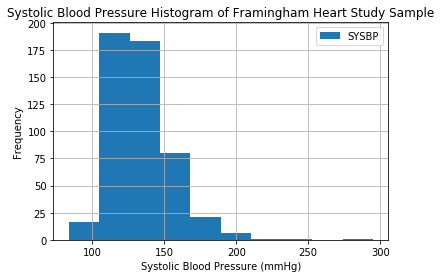

In [12]:
%matplotlib inline
framingham_heart_study.SYSBP.plot.hist(grid=True, legend=True)
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.title("Systolic Blood Pressure Histogram of Framingham Heart Study Sample")

Text(0.5, 1.0, 'Systolic Blood Pressure Box plot of Framingham Heart Study Sample')

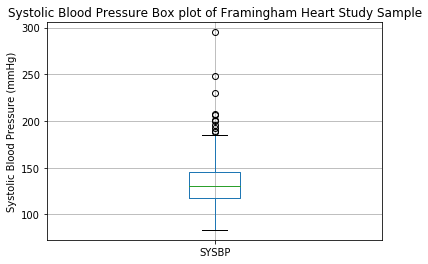

In [13]:
framingham_heart_study.SYSBP.plot.box(grid=True, legend=True)
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title("Systolic Blood Pressure Box plot of Framingham Heart Study Sample")

**Conclusion**

Comparing the histogram and the box plot alongside one another allows me to gain a better understanding of the dsitribution of the values within this column while also calling attention to the relevant outliers. From a very high level perspective, this information would be useful for physicians looking to treat the individuals with particularly concerning blood pressure. 

<br>

##### Looking at the probability of values in the Systolic Blood Pressure

In [14]:
sbp_mean, sbp_sd = framingham_heart_study.SYSBP.mean(), framingham_heart_study.SYSBP.std()

In [15]:
sbp_mean, sbp_sd

(133.282, 22.47078878672029)

In [16]:
# Calculating the probability that the Systolic Blood Pressure is greater than 150
1 - (st.norm.cdf(150, loc=sbp_mean, scale=sbp_sd))

0.22844182986384753

In [17]:
# Calculating the probability that the Systolic Blood Pressure is less than 120
st.norm.cdf(120, loc=sbp_mean, scale=sbp_sd)

0.2772339143222963